<a href="https://colab.research.google.com/github/bkrant/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

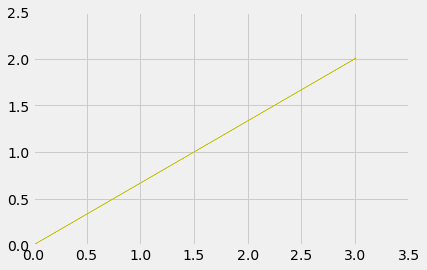

In [60]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlim(0,3.5)          
plt.ylim(0,2.5)
plt.arrow(0, 0, 3, 2, head_width=.02, head_length=0.01, color = 'y');

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


The norm or magnitude is the length of a vector.

In [12]:
import numpy as np
b = np.array([17, -4, -2, 1])
np.linalg.norm(b)

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [14]:
c = [3, 7, -2, 12]; d = [9,-7, 4, 6]
np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [19]:
E = np.array([[7,4,2],
              [1,3,-1],
              [2,6,-4]])
print('E inverse is \n', np.linalg.inv(E), '\n')
print('E transpose is \n', np.transpose(E) )

E inverse is 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]] 

E transpose is 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [20]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [36]:
mvs = df.describe().iloc[1:3,:]
mvs_T = mvs.T
mvs_T['variance'] = mvs_T['std']**2
mvs_T


,mean,std,variance
customers,1135.714286,314.264069,98761.904762
snow,2.714286,2.927700,8.571429


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 
No, because inches of snow throughout the week are much closer to each other and to the mean than weekly customers are to the mean. Therefore inches of snow variance is much lower than number of customers variance.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [42]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [54]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [62]:
from sklearn.preprocessing import StandardScaler
features = df.columns[1:].tolist()
x = df.loc[:, features].values
y = df.loc[:,['Country']].values
x = StandardScaler().fit_transform(x)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [0]:
finalDf = pd.concat([principalDf, df[['Country']]], axis = 1)

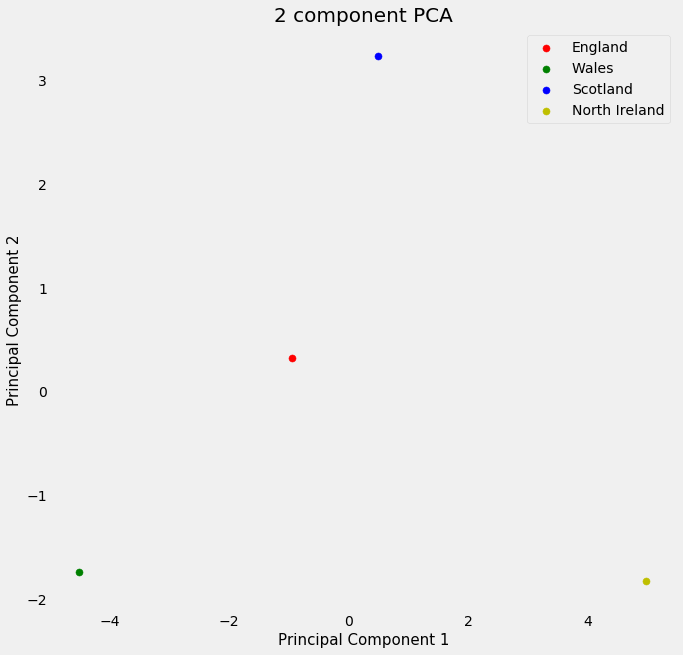

In [68]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df['Country'].unique().tolist() 
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Country'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [72]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head(2)

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729


In [0]:
from sklearn.cluster import KMeans
x = StandardScaler().fit_transform(points)
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

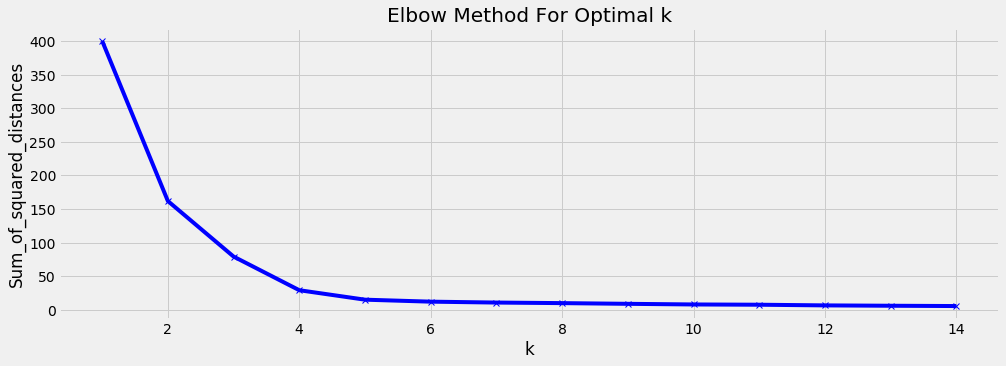

In [81]:
plt.rcParams['figure.figsize']=(15,5)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In the plot above the elbow is at k=2 indicating the optimal k for this dataset is 2.

In [84]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
labels = kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0]


In [88]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values
points.head(2)

,x,y,clusters
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,0


In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

def plot_clusters(df, column_header, centroids):
  color = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  #ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
#   plt.axes().set_aspect('equal')
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

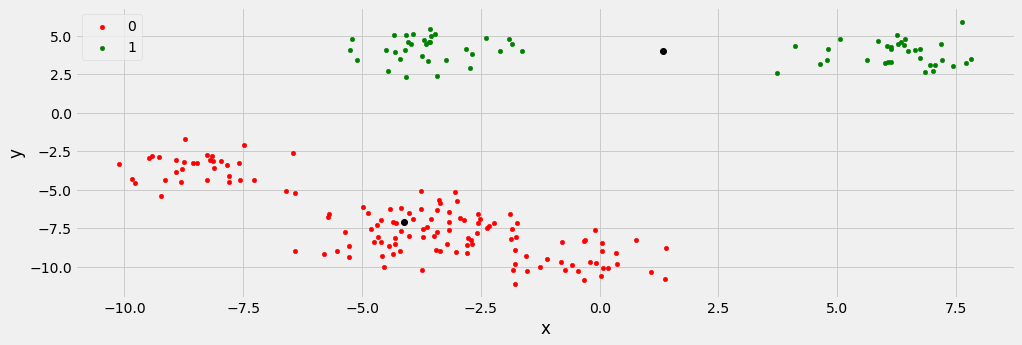

In [93]:
# We might get unlucky with different centroids and have slightly different clusters.
centroids = get_centroids(points, 'clusters')
plot_clusters(points, 'clusters', centroids)